## Importing Libraries

In [10]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Loading and Visualizing Data

In [11]:
train_batchsize = 100
test_batchsize = 100
resized_img_size = 28
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(resized_img_size, resized_img_size)),
                               torchvision.transforms.ToTensor()
                             ])
train_data = torchvision.datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform) 
test_data = torchvision.datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=train_batchsize,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=test_batchsize,
                                         shuffle=True)

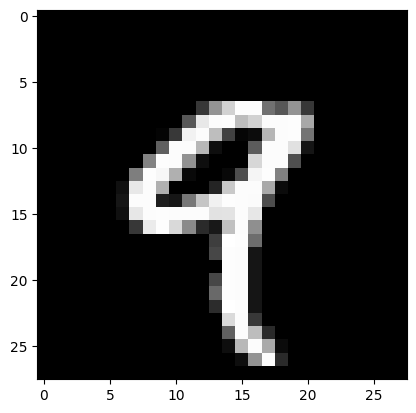

In [12]:
plt.imshow(train_data[4][0][0],cmap='gray')

# Model
In case of binary classification we can use sigmoid, however in other cases we use Softmax. There's no need to mention it as it's internally calculated in forward step.

In [13]:
import torch.nn as nn
import torch.nn.functional as F 
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.layer = nn.Linear(28*28,10)
    def forward(self,X):
        X = X.view(-1,784)
        return self.layer(X)

# Training With different Optimizers

In [16]:
from optimizers.ADAM import ADAM
from optimizers.AdaDelta import AdaDelta
from optimizers.AdaGrad import AdaGrad
from optimizers.Momentum import Momentum

trainingLoss = {}
seed = 11 
def trainDifOptimizer(optmzr):
    torch.manual_seed(seed)
    
    model = LogisticRegression()
    criterion = nn.CrossEntropyLoss()
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = ADAM(model.parameters(), lr=0.01)
    elif optmzr=='AdaDelta_scratch':
        optimizer = AdaDelta(model.parameters(), lr=0.01) 
    elif optmzr=='AdaGrad_scratch':
        optimizer = AdaGrad(model.parameters(), lr=0.01)
    elif optmzr=='Momentum_scratch':
        optimizer = Momentum(model.parameters(), lr=0.01)
    else:
      optimizer = getattr(torch.optim, optmzr)(model.parameters(), lr=0.01)
    
    n_epochs = 15 

    model.train()
    trainLossForOptimizer = []
    print("Optimizer : ", optmzr, "\n")
    for epoch in range(n_epochs):
        train_loss = 0.0

        for data, target in train_loader:
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(train_loader.dataset)
        trainLossForOptimizer.append(train_loss)
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1,
            train_loss
        ))
    torch.save(model, 'saved_models/'+optmzr+'_LogisticRegression_model')
    trainingLoss[optmzr] = trainLossForOptimizer
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam', 'RMSprop','SGD','Adadelta','Adam_scratch']

for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)
print(trainingLoss)

ImportError: cannot import name 'AdaGrad' from 'optimizers.AdaGrad' (/Users/aryan/Desktop/iiit/7sem/smai/project/ewwADAM/LR_mnist/optimizers/AdaGrad.py)

# Graph

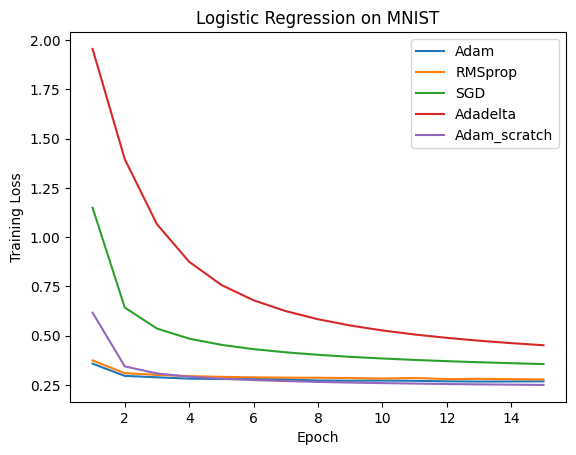

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Xval = np.arange(1, 16,1)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Logistic Regression on MNIST")
for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()